### Import libraries and data

In [10]:
library('ncdf4')
library('geosphere')

In [11]:
metadata <- read.csv('coreid_lat_long.csv')

In [12]:
nc.file <- ncdf4::nc_open("trace.22000BP-1990CE.cam2.h0.T2.0000101-2204012.nc")
mod.lat <- ncdf4::ncvar_get(nc.file,vari='lat')
mod.long <- ncdf4::ncvar_get(nc.file,vari='lon')
mod.long <- mod.long - 180

### Single sediment core

### input coordinates

In [13]:
lat1<-67.78938
lon1<-168.73352

### find indicies

In [14]:
ind_long = which.min(abs(mod.long - lon1))
ind_lat  = which.min(abs(mod.lat - lat1))

### define variables for search in TraCE data

In [15]:
start <- c(lat = ind_lat, lon = ind_long, time = 1)
count <- c(lat = 1, lon = 1, time = -1)
dim.order <- sapply(nc.file$var$TREFHT$dim, function(x) x$name)

### get TraCE data for location

In [16]:
temp_loc <- ncdf4::ncvar_get(nc.file, vari='TREFHT', start = start[dim.order], count = count[dim.order])
temp_loc <- temp_loc - 273.15

### CALENDAR
### get yearly mean calendar year data

In [17]:
cal_mean <- split(temp_loc, ceiling(seq_along(temp_loc)/12))
mean_value <- list()
for (i in 1:length(cal_mean)) {
  mean_value <- c(mean_value, mean(cal_mean[[i]]))
}
cal_mean_value <- array(as.numeric(unlist(mean_value)))
cal_years <- (length(cal_mean_value)-41):-40

### combine in dataframe

In [18]:
trace_cal_temp = data.frame(cal_years, cal_mean_value)
names(trace_cal_temp)[1] <- "Calendar years [yr BP]"
names(trace_cal_temp)[2] <- "Average yearly mean temperature [degree C]"

### Define hydrological year

In [19]:
hydrological_year_data <- temp_loc[c(10:264477)]

### HYDROLOGICAL YEAR
### get yearly mean hydrological year data

In [20]:
hydro_mean <- split(hydrological_year_data, ceiling(seq_along(hydrological_year_data)/12))
mean_value <- list()
for (i in 1:length(hydro_mean)) {
  mean_value <- c(mean_value, mean(hydro_mean[[i]]))
}
hydro_mean_value <- array(as.numeric(unlist(mean_value)))
hydro_years <- (length(hydro_mean_value)-41):-40

### combine in dataframe

In [21]:
trace_hydro_temp = data.frame(hydro_years, hydro_mean_value)
names(trace_hydro_temp)[1] <- "Full hydrological years [yr BP]"
names(trace_hydro_temp)[2] <- "Average yearly mean temperature [degree C]"

### get hydrological summer and winter temp data

In [22]:
hydro_half_mean <- split(hydrological_year_data, ceiling(seq_along(hydrological_year_data)/6))
winter_mean_value <- list()
summer_mean_value <- list()
for (i in 1:length(hydro_half_mean)) {
    if (i %% 2) {
        winter_mean_value <- c(winter_mean_value, mean(hydro_half_mean[[i]]))
    } else {
        summer_mean_value <- c(summer_mean_value, mean(hydro_half_mean[[i]]))
    }
}
hydro_winter_mean_value <- array(as.numeric(unlist(winter_mean_value)))
hydro_summer_mean_value <- array(as.numeric(unlist(summer_mean_value)))
hydro_years <- (length(hydro_winter_mean_value)-41):-40

### combine in dataframe

In [23]:
trace_hydro_win_temp = data.frame(hydro_years, hydro_winter_mean_value)
names(trace_hydro_win_temp)[1] <- "Winter months (October to March) of hydrological\n years [yr BP]"
names(trace_hydro_win_temp)[2] <- "Average winter mean temperature [degree C]"
trace_hydro_sum_temp = data.frame(hydro_years, hydro_summer_mean_value)
names(trace_hydro_sum_temp)[1] <- "Summer months (April to September) of hydrological\n years [yr BP]"
names(trace_hydro_sum_temp)[2] <- "Average summer mean temperature [degree C]"

### JJA and DJF
### define year

In [25]:
quarter_year_data <- temp_loc[c(3:264479)]

### get DJF and JJA temperature data

In [40]:
quarter_mean <- split(quarter_year_data, ceiling(seq_along(quarter_year_data)/3))
DJF_mean_value <- list()
JJA_mean_value <- list()
for (i in 1:length(quarter_mean)) {
    if ((i %% 4) == 0) {
        DJF_mean_value <- c(DJF_mean_value, mean(quarter_mean[[i]]))
    } else if ((i %% 4) == 2) {
        JJA_mean_value <- c(JJA_mean_value, mean(quarter_mean[[i]]))
    }
}
DJF_temp_mean_value <- array(as.numeric(unlist(DJF_mean_value)))
JJA_temp_mean_value <- array(as.numeric(unlist(JJA_mean_value)))
DJF_years <- (length(DJF_temp_mean_value)-41):-40
JJA_years <- (length(JJA_temp_mean_value)-41):-40

### combine in dataframe

In [41]:
trace_DJF_temp = data.frame(DJF_years, DJF_temp_mean_value)
names(trace_DJF_temp)[1] <- "Winter months (December-January-February) of each years [yr BP]"
names(trace_DJF_temp)[2] <- "Average winter mean temperature [degree C]"
trace_JJA_temp = data.frame(JJA_years, JJA_temp_mean_value)
names(trace_JJA_temp)[1] <- "Summer months (Jule-July-August) of each years [yr BP]"
names(trace_JJA_temp)[2] <- "Average summer mean temperature [degree C]"

### plot the data

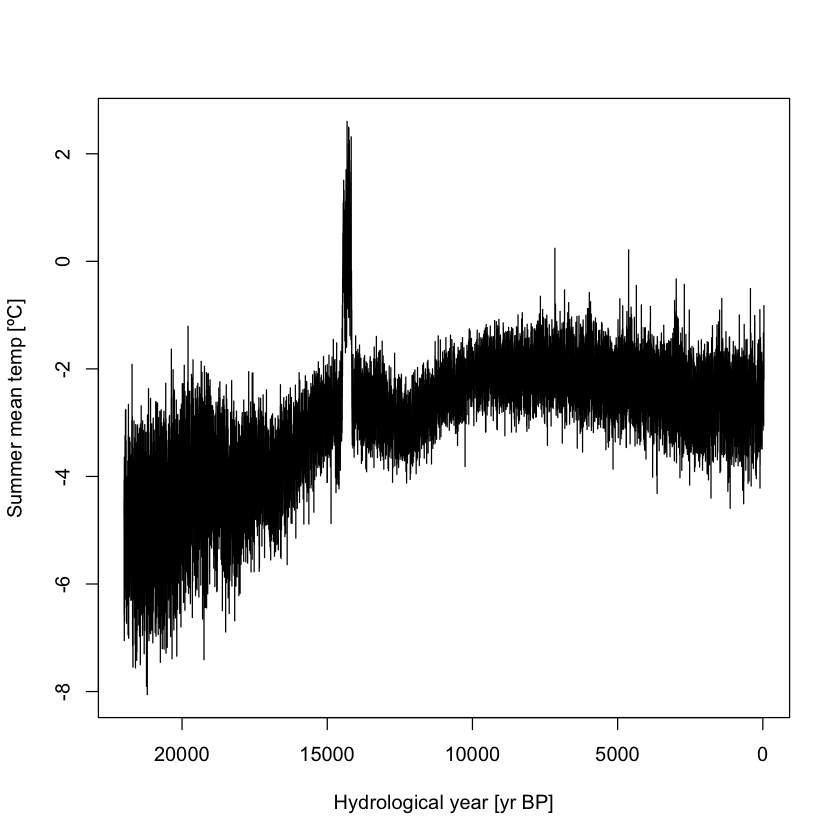

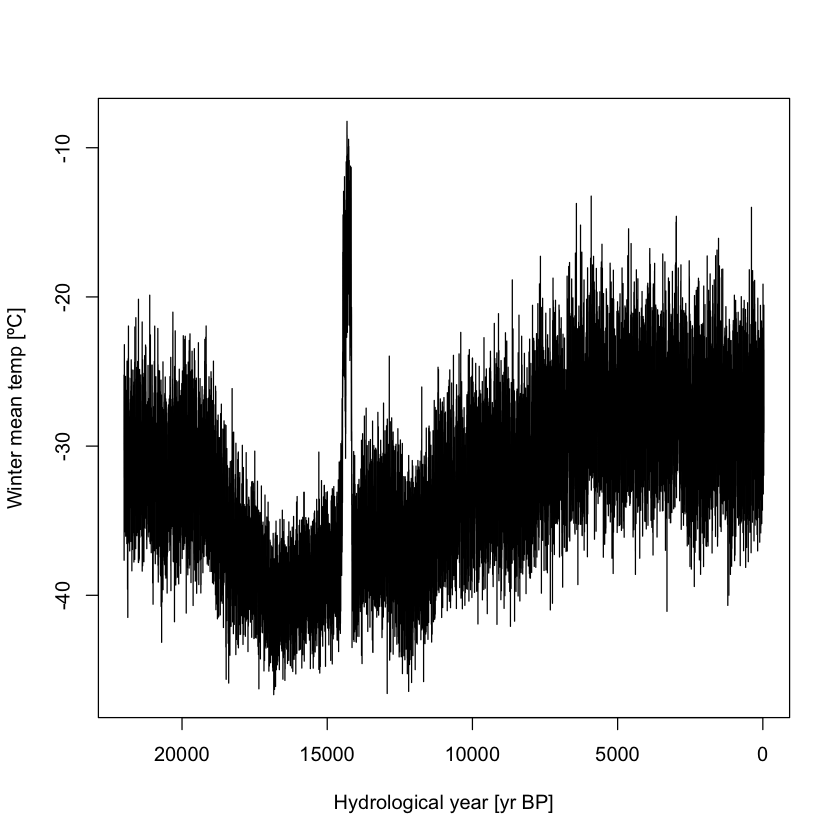

In [43]:
plot(x= cal_years, y = cal_mean_value, type = 'l', xlim = rev(range(cal_years)), ylab = 'Yearly mean temp [ºC]', xlab = 'Age [yr BP]')
plot(x= hydro_years, y = hydro_mean_value, type = 'l', xlim = rev(range(hydro_years)), ylab = 'Yearly mean temp [ºC]', xlab = 'Hydrological year [yr BP]')
plot(x= hydro_years, y = hydro_winter_mean_value, type = 'l', xlim = rev(range(hydro_years)), ylab = 'Winter mean temp [ºC]', xlab = 'Hydrological year [yr BP]')
plot(x= hydro_years, y = hydro_summer_mean_value, type = 'l', xlim = rev(range(hydro_years)), ylab = 'Summer mean temp [ºC]', xlab = 'Hydrological year [yr BP]')
plot(x= JJA_years, y = JJA_temp_mean_value, type = 'l', xlim = rev(range(JJA_years)), ylab = 'Summer mean temp [ºC]', xlab = 'Hydrological year [yr BP]')
plot(x= DJF_years, y = DJF_temp_mean_value, type = 'l', xlim = rev(range(DJF_years)), ylab = 'Winter mean temp [ºC]', xlab = 'Hydrological year [yr BP]')

### save as csv (example)

In [ ]:
coreid <- 'EN18218'
path_sum <- paste('output_data/',coreid,'_summer_temp_TraCe_data.csv', sep = '')
write.csv(trace_hydro_sum_temp, path_sum, row.names = FALSE)

### Loop for every sediment core

In [44]:
for (i in 1:length(rownames(metadata))){
    ### get data
    coreid <- gsub(" ", "", metadata[i,]$coreid, fixed = TRUE)
    lat <- metadata[i,]$latitude
    long <- metadata[i,]$longitude
    ### find indicies
    ind_long = which.min(abs(mod.long - long))
    ind_lat  = which.min(abs(mod.lat - lat))
    ### define variables for search in TraCE data
    start <- c(lat = ind_lat, lon = ind_long, time = 1)
    count <- c(lat = 1, lon = 1, time = -1)
    dim.order <- sapply(nc.file$var$TREFHT$dim, function(x) x$name)
    ### get TraCE data for location
    temp_loc <- ncdf4::ncvar_get(nc.file, vari='TREFHT', start = start[dim.order], count = count[dim.order])
    temp_loc <- temp_loc - 273.15
    
    #### CALENDAR
    #### get yearly mean calendar year data
    #cal_mean <- split(temp_loc, ceiling(seq_along(temp_loc)/12))
    #mean_value <- list()
    #for (i in 1:length(cal_mean)) {
    #  mean_value <- c(mean_value, mean(cal_mean[[i]]))
    #}
    #cal_mean_value <- array(as.numeric(unlist(mean_value)))
    #cal_years <- (length(cal_mean_value)-41):-40
    #### combine in dataframe
    #trace_cal_temp = data.frame(cal_years, cal_mean_value)
    #names(trace_cal_temp)[1] <- "Calendar years [yr BP]"
    #names(trace_cal_temp)[2] <- "Average yearly mean temperature [degree C]"
    #### save as csv
    #path_cal <- paste('output_data/',coreid,'_calendar_temp_TraCe_data.csv', sep = '')
    #write.csv(trace_cal_temp, path_cal, row.names = FALSE)
    #                    
    #### Define hydrological year
    #hydrological_year_data <- temp_loc[c(10:264477)]
    #                    
    #### HYDROLOGICAL YEAR
    #### get yearly mean hydrological year data
    #hydro_mean <- split(hydrological_year_data, ceiling(seq_along(hydrological_year_data)/12))
    #mean_value <- list()
    #for (i in 1:length(hydro_mean)) {
    #  mean_value <- c(mean_value, mean(hydro_mean[[i]]))
    #}
    #hydro_mean_value <- array(as.numeric(unlist(mean_value)))
    #hydro_years <- (length(hydro_mean_value)-41):-40
    #### combine in dataframe
    #trace_hydro_temp = data.frame(hydro_years, hydro_mean_value)
    #names(trace_hydro_temp)[1] <- "Full hydrological years [yr BP]"
    #names(trace_hydro_temp)[2] <- "Average yearly mean temperature [degree C]"
    #### save as csv
    #path_hydro <- paste('output_data/',coreid,'_hydrological_year_temp_TraCe_data.csv', sep = '')
    #write.csv(trace_hydro_temp, path_hydro, row.names = FALSE)
    #
    #### get hydrological summer and winter temp data
    #hydro_half_mean <- split(hydrological_year_data, ceiling(seq_along(hydrological_year_data)/6))
    #winter_mean_value <- list()
    #summer_mean_value <- list()
    #for (i in 1:length(hydro_half_mean)) {
    #    if (i %% 2) {
    #        winter_mean_value <- c(winter_mean_value, mean(hydro_half_mean[[i]]))
    #    } else {
    #        summer_mean_value <- c(summer_mean_value, mean(hydro_half_mean[[i]]))
    #    }
    #}
    #hydro_winter_mean_value <- array(as.numeric(unlist(winter_mean_value)))
    #hydro_summer_mean_value <- array(as.numeric(unlist(summer_mean_value)))
    #hydro_years <- (length(hydro_winter_mean_value)-41):-40
    #### combine in dataframe
    #trace_hydro_win_temp = data.frame(hydro_years, hydro_winter_mean_value)
    #names(trace_hydro_win_temp)[1] <- "Winter months (October to March) of hydrological\n years [yr BP]"
    #names(trace_hydro_win_temp)[2] <- "Average winter mean temperature [degree C]"
    #trace_hydro_sum_temp = data.frame(hydro_years, hydro_summer_mean_value)
    #names(trace_hydro_sum_temp)[1] <- "Summer months (April to September) of hydrological\n years [yr BP]"
    #names(trace_hydro_sum_temp)[2] <- "Average summer mean temperature [degree C]"
    #### save as csv                    
    #path_sum <- paste('output_data/',coreid,'_summer_temp_TraCe_data.csv', sep = '')
    #write.csv(trace_hydro_sum_temp, path_sum, row.names = FALSE)
    #path_win <- paste('output_data/',coreid,'_winter_temp_TraCe_data.csv', sep = '')
    #write.csv(trace_hydro_win_temp, path_win, row.names = FALSE)
    #                    
    ### JJA and DJF
    ### define year
    quarter_year_data <- temp_loc[c(3:264479)]
    ### get DJF and JJA temperature data
    quarter_mean <- split(quarter_year_data, ceiling(seq_along(quarter_year_data)/3))
    DJF_mean_value <- list()
    JJA_mean_value <- list()
    for (i in 1:length(quarter_mean)) {
        if ((i %% 4) == 0) {
            DJF_mean_value <- c(DJF_mean_value, mean(quarter_mean[[i]]))
        } else if ((i %% 4) == 2) {
            JJA_mean_value <- c(JJA_mean_value, mean(quarter_mean[[i]]))
        }
    }
    DJF_temp_mean_value <- array(as.numeric(unlist(DJF_mean_value)))
    JJA_temp_mean_value <- array(as.numeric(unlist(JJA_mean_value)))
    DJF_years <- (length(DJF_temp_mean_value)-41):-40
    JJA_years <- (length(JJA_temp_mean_value)-41):-40
    ### combine in dataframe
    trace_DJF_temp = data.frame(DJF_years, DJF_temp_mean_value)
    names(trace_DJF_temp)[1] <- "Winter months (December-January-February) of each years [yr BP]"
    names(trace_DJF_temp)[2] <- "Average winter mean temperature [degree C]"
    trace_JJA_temp = data.frame(JJA_years, JJA_temp_mean_value)
    names(trace_JJA_temp)[1] <- "Summer months (Jule-July-August) of each years [yr BP]"
    names(trace_JJA_temp)[2] <- "Average summer mean temperature [degree C]"
    ### save as csv                    
    path_DJF <- paste('output_data/',coreid,'_DJF_temp_TraCe_data.csv', sep = '')
    write.csv(trace_DJF_temp, path_DJF, row.names = FALSE)
    path_JJA <- paste('output_data/',coreid,'_JJA_temp_TraCe_data.csv', sep = '')
    write.csv(trace_JJA_temp, path_JJA, row.names = FALSE)
}